<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>PYTHON PROJECT</b></u>
</div>


<div style="text-align: center; font-size: 24px; color: black;">
    <i>SEETHA V</i>
</div>

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>INTRODUCTION</b></u>
</div>

<div style="text-align: center; font-size: 24px; color: black;">
    <p>This project focuses on analyzing employee data across different teams and positions within a company. It involves preprocessing and cleaning the data, followed by tasks such as analyzing team distribution, salary expenditure, and employee attributes like age, salary, and position. 
The goal is to uncover key patterns, correlations, and insights to better understand the workforce structure and dynamics.</p>
</div>

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>IMPORTING MODULES</b></u>
</div>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>LOAD DATASET</b></u>
</div>

In [21]:
# Load the dataset
data = pd.read_excel("project_dataset.xlsx")

# Display the first few rows to understand the structure of the data
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [23]:
# CREATE COPY OF ORIGINAL DATASET
data_copy = data.copy()
data_copy

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>PREPROCESSING</b></u>
</div>

In [26]:
# Correct the data in the "height" column by replacing it with random numbers between 150 and 180. 
# Ensure data consistency and integrity before proceeding with analysis.

# Replace 'height' column values with random values between 150 and 180
data["Height"] = np.random.randint(150, 181, size=len(data))

# Verify the change
data.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,164,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,152,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,158,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,174,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,160,231,NaN,5000000.0


In [28]:
# To find sum of null vales in each column
data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [30]:
# Replace null values in "Salary" with Mean

data["Salary"].fillna(data["Salary"].mean(), inplace = True)
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,164,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,152,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,158,205,Boston University,4.833970e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,174,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,160,231,NaN,5.000000e+06
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,155,203,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,24,174,179,NaN,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,26,172,256,NaN,2.900000e+06
456,Jeff Withey,Utah Jazz,24,C,26,178,231,Kansas,9.472760e+05


<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>ANALYSIS TASK</b></u>
</div>

<div style="text-align: center; font-size: 24px; color: black;">
    <P>1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.</P>
</div>

In [34]:
# Count of employees in each team
team_counts = data["Team"].value_counts()

#Total Employee
total_employees = len(data)

# Calculate percentage split
team_percentages = (team_counts / total_employees) * 100

# Combine both into a DataFrame
team_distribution = pd.DataFrame({
    "Count": team_counts, "Percentage(%)": team_percentages.round(2)})

# Display the team distribution
team_distribution


,Count,Percentage(%)
Team,,
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
New York Knicks,16,3.49
Milwaukee Bucks,16,3.49
Brooklyn Nets,15,3.28
Portland Trail Blazers,15,3.28
Oklahoma City Thunder,15,3.28
Denver Nuggets,15,3.28


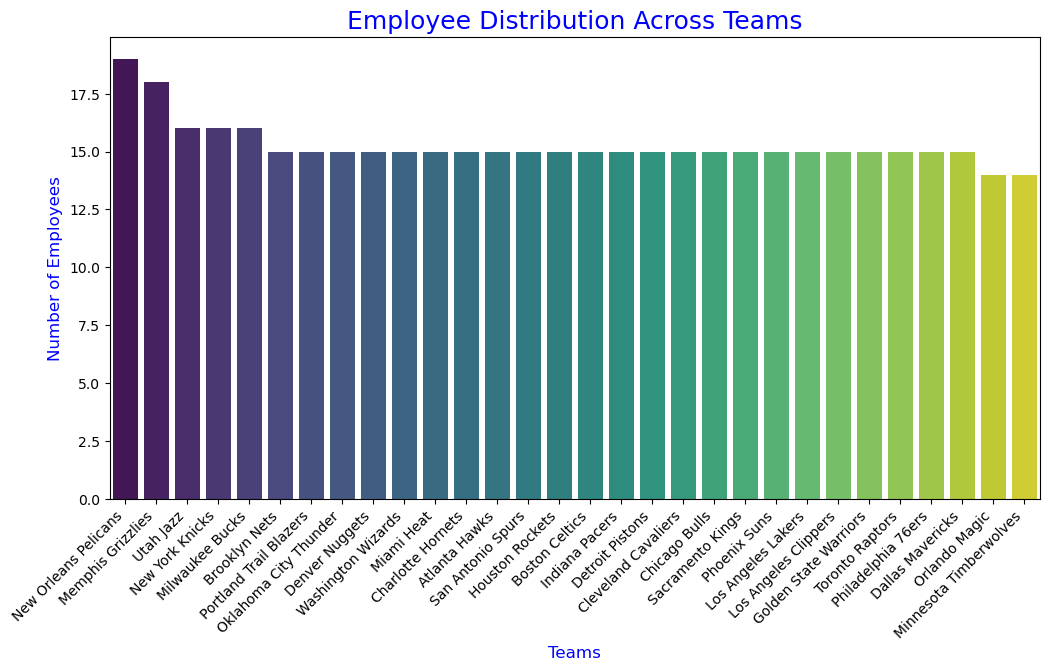

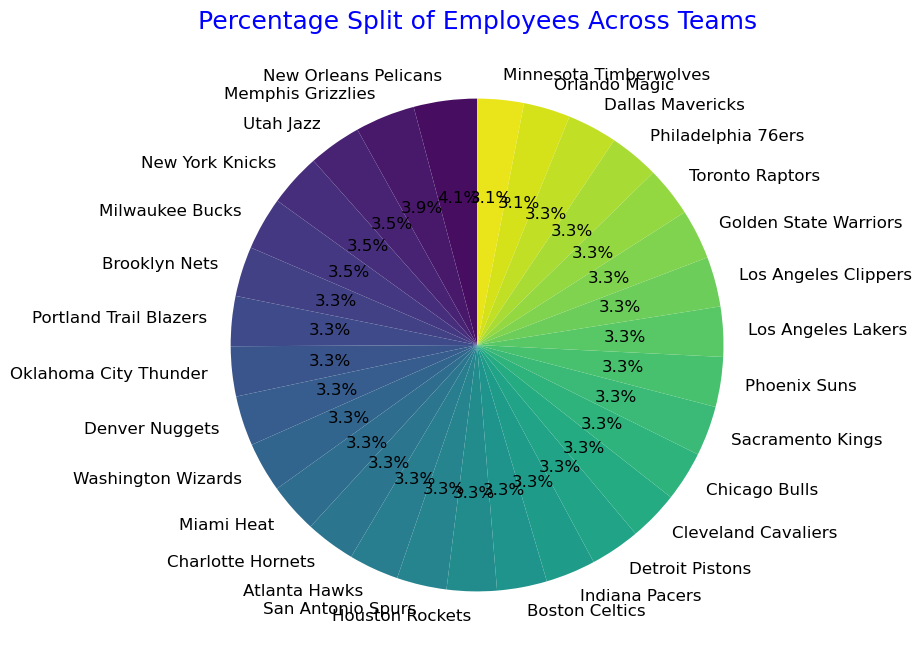

In [36]:
# Visualize the team distribution.

# Create a bar plot for team distribution
plt.figure(figsize=(12,6), dpi=100)

# Generate a color palette with different colors for each bar
colors = sns.color_palette("viridis", len(team_distribution)) 

sns.barplot(x=team_distribution.index, y=team_distribution["Count"], palette=colors)
plt.title("Employee Distribution Across Teams", fontsize =18, color = "blue")
plt.xlabel("Teams", fontsize = 12, color ="blue")
plt.ylabel("Number of Employees", fontsize = 12, color = "blue")
plt.xticks(rotation=45, ha = "right")
plt.show()

# Create a pie chart for the percentage split
plt.figure(figsize=(8,8), dpi = 100)
plt.pie(team_distribution["Percentage(%)"], labels=team_distribution.index, 
        autopct="%1.1f%%", colors=colors, textprops={'fontsize': 12}, startangle=90)
plt.title("Percentage Split of Employees Across Teams", fontsize = 18, color="blue")
plt.ylabel('')  # To remove the 'Teams' label on the side
plt.show()

<div style="text-align: center; font-size: 24px; color: black;">
    <P>2. Segregate employees based on their positions within the company</P>
</div>

In [39]:
# Group the data by the "Position" column and count the number of employees in each position
position_counts = data["Position"].value_counts()

# Create a DataFrame to display the counts
position_distribution = pd.DataFrame({
    "Position": position_counts.index, "Employee Count": position_counts.values})

# Display the position distribution DataFrame
print(position_distribution)


  Position  Employee Count
0       SG             102
1       PF             100
2       PG              92
3       SF              85
4        C              79


In [41]:
# print details of Employees in each positions seperately
positions = data["Position"].unique() # Get unique positions
for position in positions:
    # Filter the data 
    employees_in_position = data[data["Position"] == position].head(5) 
    print(f"\nPosition: {position}")
    print(employees_in_position[["Name", "Age", "Salary", "Team", "Height"]])  



Position: PG
             Name  Age     Salary            Team  Height
0   Avery Bradley   25  7730337.0  Boston Celtics     164
8    Terry Rozier   22  1824360.0  Boston Celtics     154
9    Marcus Smart   22  3431040.0  Boston Celtics     171
11  Isaiah Thomas   27  6912869.0  Boston Celtics     174
19   Jarrett Jack   32  6300000.0   Brooklyn Nets     177

Position: SF
                      Name  Age      Salary             Team  Height
1              Jae Crowder   25   6796117.0   Boston Celtics     152
32  Thanasis Antetokounmpo   23     30888.0  New York Knicks     160
33         Carmelo Anthony   32  22875000.0  New York Knicks     166
35        Cleanthony Early   25    845059.0  New York Knicks     159
42            Lance Thomas   28   1636842.0  New York Knicks     164

Position: SG
                Name  Age        Salary            Team  Height
2       John Holland   27  4.833970e+06  Boston Celtics     158
3        R.J. Hunter   22  1.148640e+06  Boston Celtics     174
12  

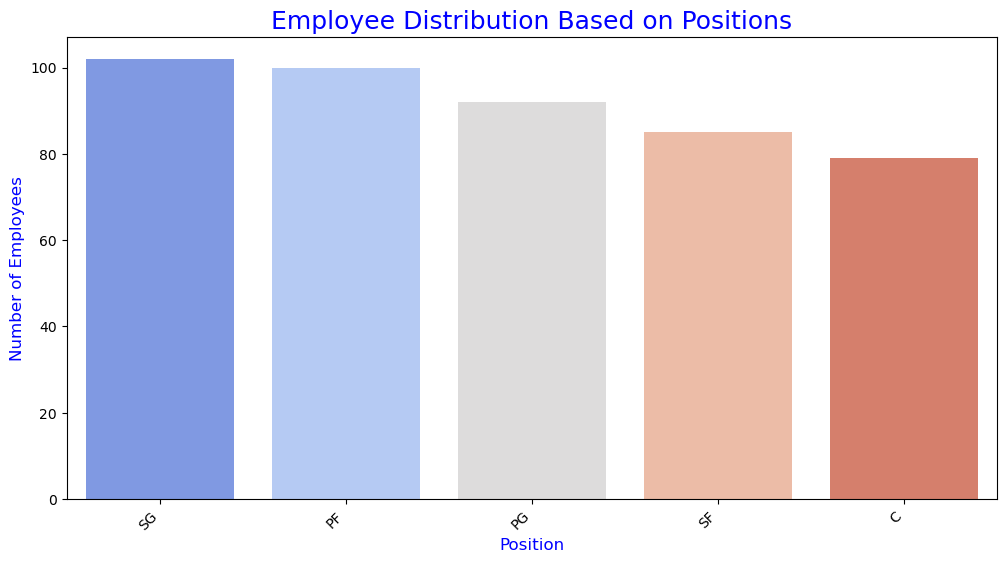

In [43]:
# Visualization: Bar plot of employee counts based on position

plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x=position_distribution["Position"], 
            y=position_distribution["Employee Count"], palette="coolwarm")
plt.title("Employee Distribution Based on Positions", fontsize=18, color="blue")
plt.xlabel("Position",fontsize=12,color="blue")
plt.ylabel("Number of Employees",fontsize=12,color="blue")
plt.xticks(rotation=45, ha="right")
plt.show()


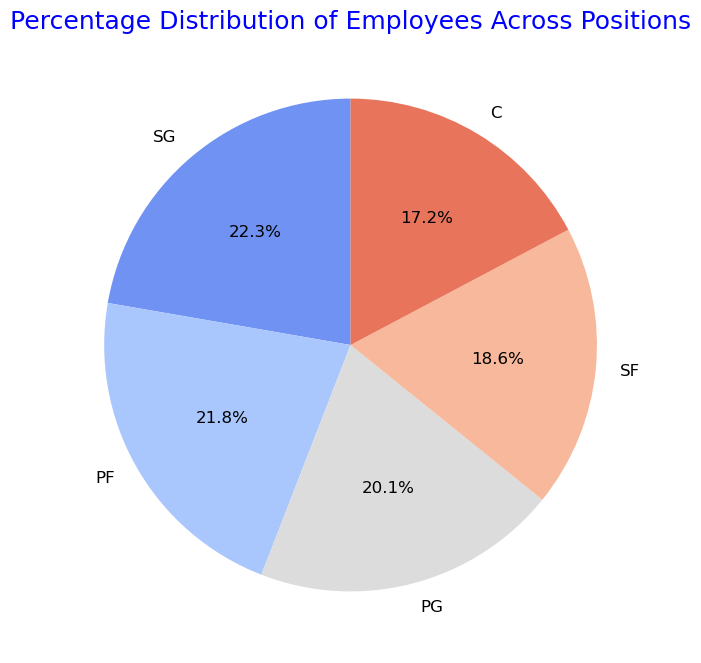

In [89]:
# Calculate the percentage distribution of employees across positions
position_percentages = (position_counts / len(data)) * 100

# Create a pie chart for the percentage distribution
plt.figure(figsize=(8, 8), dpi=100)
colors = sns.color_palette("coolwarm", len(position_percentages))
plt.pie(position_percentages, labels=position_percentages.index, 
        autopct="%1.1f%%", colors=colors, 
        startangle=90, textprops={"fontsize": 12})
plt.title("Percentage Distribution of Employees Across Positions", 
          fontsize=18, color="blue")
plt.show()


<div style="text-align: center; font-size: 24px; color: black;">
    <P>3. Identify the predominant age group among employees.</P>
</div>

In [46]:
# Define the age bins and corresponding labels
age_bins = [0, 20, 25, 30, 35, 40]  # Age bins
age_labels = ["0-19", "20-25", "26-30", "31-35", "36-40"]  # Labels for the bins

# Create a temporary 'Age Group' variable based on 'Age' without modifying the original data
temp_age_group = pd.cut(data["Age"], bins=age_bins, labels=age_labels, right=False)

# Count the number of employees in each age group using the temporary 'Age Group' variable
age_group_counts = temp_age_group.value_counts().sort_index()
age_group_counts.name = "Age Distribution"

# Display the distribution of employees across age groups
print(age_group_counts)

#identify and display the predominant age group
predominant_age_group = age_group_counts.idxmax()
predominant_count = age_group_counts.max()

# Display the predominant age group and the count of employees in that group
print(f"\nPredominant Age Group: {predominant_age_group} with {predominant_count} employees")



Age
0-19       2
20-25    152
26-30    182
31-35     90
36-40     29
Name: Age Distribution, dtype: int64

Predominant Age Group: 26-30 with 182 employees


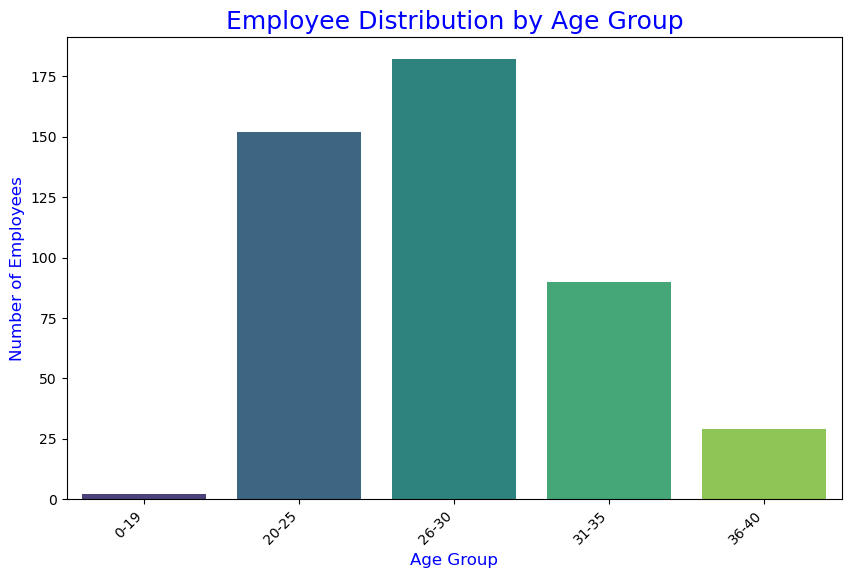

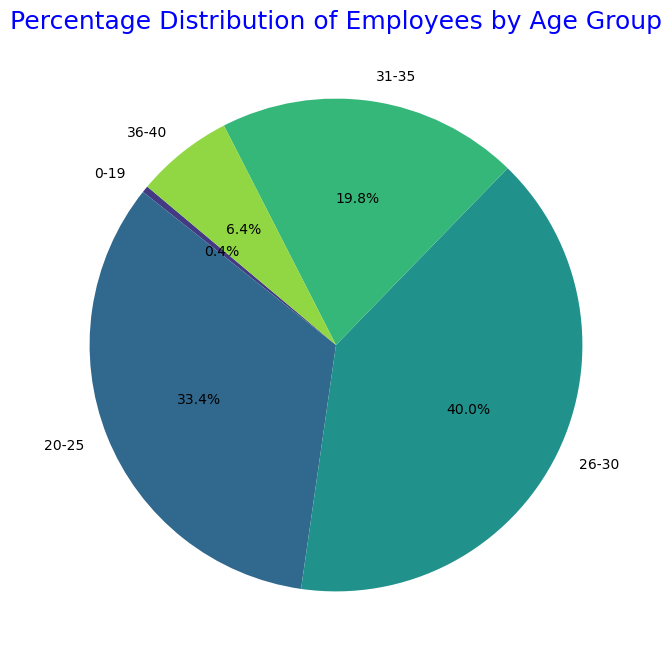

In [48]:
# Visualization

# Create a barplot for the distribution of employees by age group
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")
plt.title("Employee Distribution by Age Group", fontsize=18, color="blue")
plt.xlabel("Age Group", fontsize=12,color = "blue")
plt.ylabel("Number of Employees", fontsize=12,color = "blue")
plt.xticks(rotation=45, ha = "right")
plt.show()

# Create a pie chart for the percentage distribution of employees by age group
plt.figure(figsize=(8, 8), dpi=100)
plt.pie(age_group_counts, labels=age_group_counts.index, autopct="%1.1f%%", 
        startangle=140, colors=sns.color_palette("viridis", len(age_group_counts)))
plt.title("Percentage Distribution of Employees by Age Group", fontsize=18, color="blue")
plt.show()


<div style="text-align: center; font-size: 24px; color: black;">
    <P>4. Discover which team and position have the highest salary expenditure.</P>
</div>

In [53]:
# Calculate total salary expenditure by team
team_salary_expenditure = data.groupby("Team")["Salary"].sum().sort_values(ascending = False)
team_salary_expenditure.name = "Team Salary"

# Calculate total salary expenditure by position
position_salary_expenditure = data.groupby("Position")["Salary"].sum().sort_values(ascending = False)
position_salary_expenditure.name = "Position Salary"

# Find the team and position with the highest salary expenditure
highest_team_salary = team_salary_expenditure.idxmax()
highest_position_salary = position_salary_expenditure.idxmax()

#Display the Result
print("TOTAL SALARY EXPENDITURE BY TEAM")
print(team_salary_expenditure,"\n")
print(f"Team with the highest salary expenditure:{highest_team_salary} (${team_salary_expenditure.max():,.2f})\n")

print("TOTAL SALARY EXPENDITURE BY POSITION")
print(position_salary_expenditure,"\n")
print(f"Position with the highest salary expenditure:{highest_position_salary} (${position_salary_expenditure.max():,.2f})\n")


TOTAL SALARY EXPENDITURE BY TEAM
Team
Cleveland Cavaliers       1.118227e+08
Memphis Grizzlies         9.588676e+07
Los Angeles Clippers      9.485464e+07
Oklahoma City Thunder     9.376530e+07
Miami Heat                9.218361e+07
Golden State Warriors     8.886900e+07
Chicago Bulls             8.678338e+07
San Antonio Spurs         8.444273e+07
New Orleans Pelicans      8.275077e+07
Charlotte Hornets         7.834092e+07
Washington Wizards        7.632864e+07
Houston Rockets           7.528302e+07
New York Knicks           7.330390e+07
Atlanta Hawks             7.290295e+07
Los Angeles Lakers        7.177043e+07
Sacramento Kings          7.168367e+07
Dallas Mavericks          7.119873e+07
Toronto Raptors           7.111761e+07
Milwaukee Bucks           6.960352e+07
Detroit Pistons           6.716826e+07
Indiana Pacers            6.675183e+07
Denver Nuggets            6.495590e+07
Minnesota Timberwolves    6.454367e+07
Utah Jazz                 6.400737e+07
Phoenix Suns              

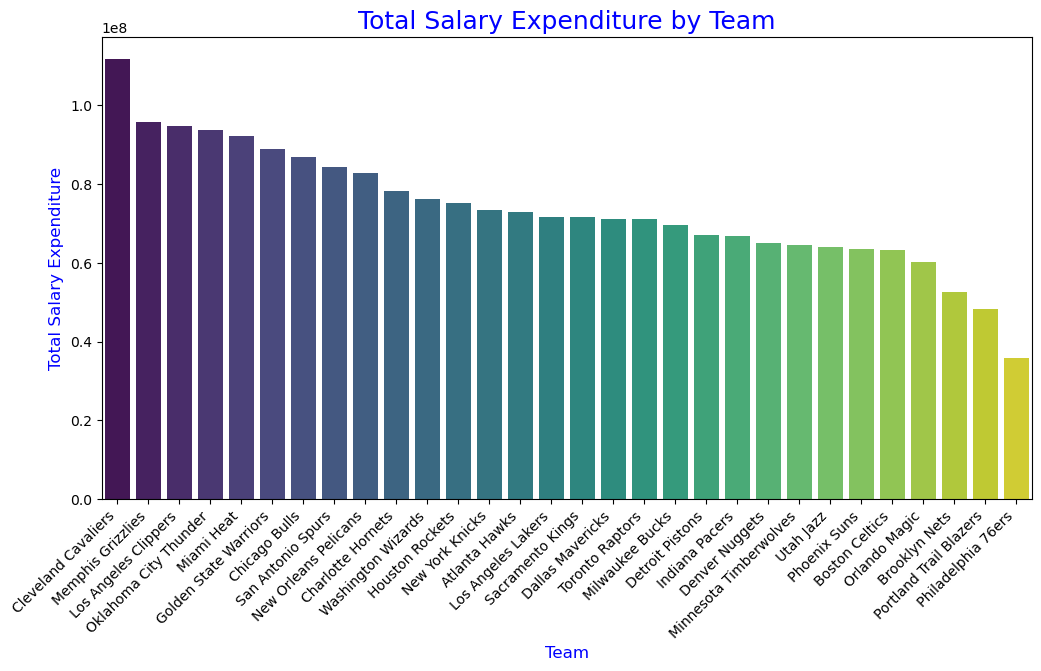

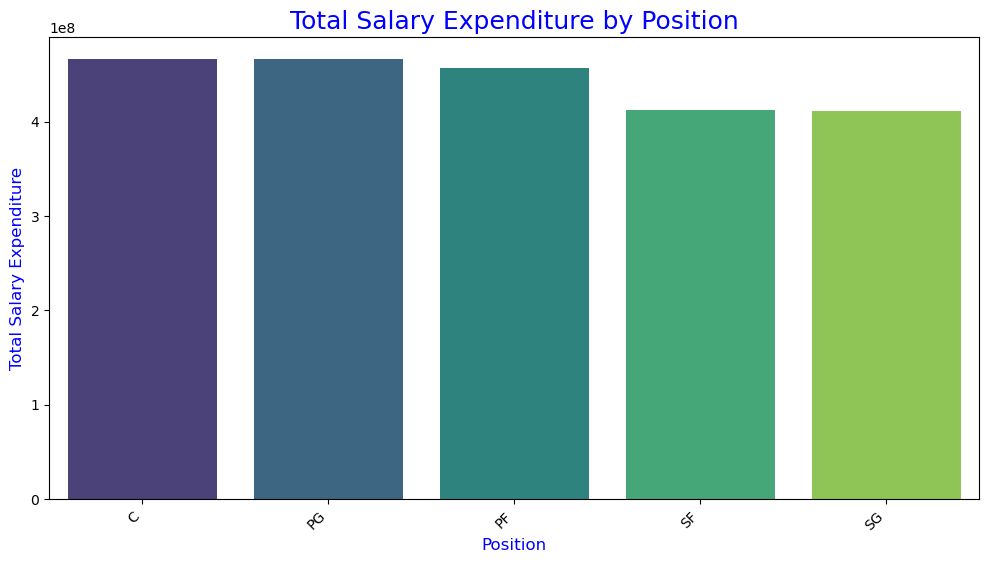

In [55]:
# Visualizing salary expenditure by team
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x=team_salary_expenditure.index, 
            y=team_salary_expenditure.values, palette='viridis')
plt.title("Total Salary Expenditure by Team", fontsize=18, color='blue')
plt.xlabel("Team", fontsize=12,color = "blue")
plt.ylabel("Total Salary Expenditure", fontsize=12, color = "blue")
plt.xticks(rotation=45, ha = "right")
plt.show()

# Visualizing salary expenditure by position
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x=position_salary_expenditure.index, 
            y=position_salary_expenditure.values, palette='viridis')
plt.title("Total Salary Expenditure by Position", fontsize=18, color='blue')
plt.xlabel("Position", fontsize=12, color = "blue")
plt.ylabel("Total Salary Expenditure", fontsize=12, color = "blue")
plt.xticks(rotation=45, ha = "right")
plt.show()


<div style="text-align: center; font-size: 24px; color: black;">
    <P> 5. Investigate if there's any correlation between age and salary, and represent it visually. </P>
</div>

In [58]:
# Calculate the correlation between 'Age' and 'Salary'
correlation = data["Age"].corr(data["Salary"])
print(f"Correlation between Age and Salary: {correlation:.2f}")

# Determine the type of correlation
if correlation > 0:
    correlation_type = "Positive Correlation"
elif correlation < 0:
    correlation_type = "Negative Correlation"
else:
    correlation_type = "No Correlation"

# Print the correlation type
print(f"The correlation between Age and Salary is: {correlation_type}")



Correlation between Age and Salary: 0.21
The correlation between Age and Salary is: Positive Correlation


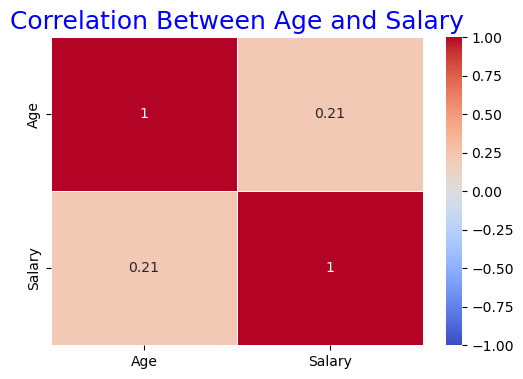

In [60]:
# Calculate the correlation matrix between Age and Salary
correlation_matrix = data[["Age", "Salary"]].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))  
sns.heatmap(correlation_matrix, annot=True, 
            cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Between Age and Salary", fontsize=18, color="blue")
plt.show()


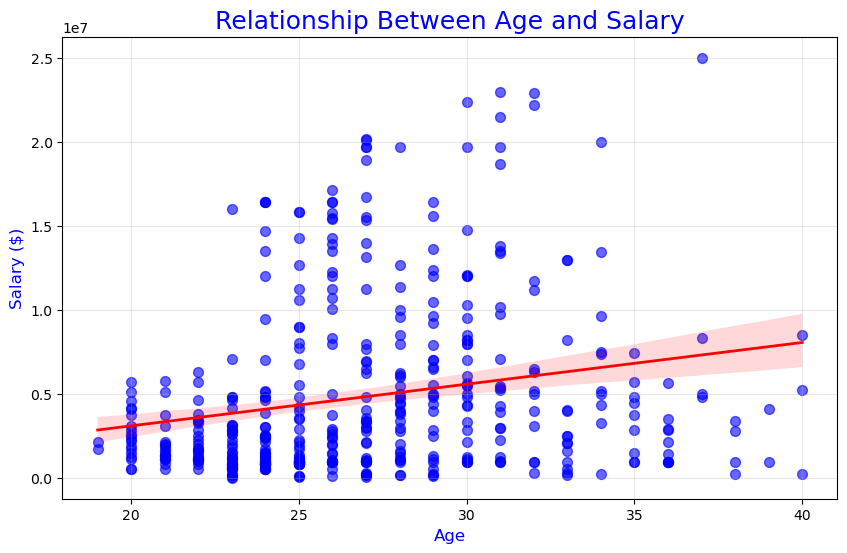

In [62]:
# Create a scatter plot with a regression (trend) line
plt.figure(figsize=(10, 6), dpi=100)  # Set the figure size
sns.regplot(x=data["Age"], y=data["Salary"], 
            scatter_kws={"color": "blue", "s": 50, "alpha": 0.6},
            line_kws={"color": "red", "linewidth": 2})
plt.title("Relationship Between Age and Salary", fontsize=18, color='blue')
plt.xlabel("Age", fontsize=12, color = "blue")
plt.ylabel("Salary ($)", fontsize=12, color = "blue")
plt.grid(alpha=0.3)
plt.show()


<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>PROJECT OVERVIEW</b></u>
</div>

<div style="text-align: left; font-size: 30px; color: blUE;">
    <u><b>PROPROCESSING</b></u>
</div>

<div style="text-align: left; font-size: 28px; color: violet;">
    <b>1. Cleaning the "Height" Column</b>
</div>
<div style="text-align: center; font-size: 23px; color: black;">
    <p><strong>* Objective:</strong> Ensure that the "height" column contains valid values by replacing any incorrect or inconsistent values with random numbers between 150 and 180.</pre></p>
    <p><strong>* Action:</strong> Identify any invalid height data (e.g., outliers, missing values) and replace them with random values in the specified range.</p>
</div>

<div style="text-align: left; font-size: 28px; color: violet;">
    <b>2. Replacing Null Values in the Salary Column</b>
</div>
<div style="text-align: center; font-size: 23px; color: black;">
    <p><strong>* Objective:</strong> Handle missing data in the "salary" column by replacing any null or missing values with the mean salary of the entire dataset.</p>
    <p><strong>* Action:</strong>Calculate the mean salary of the non-null values and replace any missing salary values with this mean.</p>
</div>

<div style="text-align: left; font-size: 28px; color: violet;">
    <b>3. Data Validation and Cleaning</b>
</div>
<div style="text-align: center; font-size: 23px; color: black;">
    <p><strong>* Objective:</strong> Ensure the dataset is clean and consistent.</p>
    <p><strong>* Action:</strong></p>
    <ul style="text-align: left; font-size: 20px;">
        <li><strong>Remove Duplicates:</strong> Identify and remove any duplicate rows in the dataset.</li>
        <li><strong>Check for Inconsistent Data:</strong> Validate that all columns have consistent data types and correct any anomalies (e.g., text values in numeric columns).</li>
        <li><strong>Fix Incorrect Data:</strong> Identify and correct any data inconsistencies in other columns (such as negative ages or salaries</li>
    </ul>
</div>ies).</li>
    </ul>
</div>

</div>


<div style="text-align: left; font-size: 30px; color: blUE;">
    <u><b>ANALYSIS AND INSIGHTS</b></u>
</div>

<div style="text-align: left; font-size: 28px; color: violet;">
    <b>1. Distribution of Players Across Teams</b>
</div>
<div style="text-align: center; font-size: 23px; color: black;">
    <p><strong>* Objective:</strong> To analyze how players are distributed across different teams and calculate their percentage distribution relative to the total number of players.</pre></p>
    <p><strong>* Insight:</strong> This analysis will help in understanding the team structure and the proportion of players in each team. By identifying the team with the highest number of players, we can highlight which team is most represented in the dataset.</p>
    <p><strong>* Visualization:</strong> A bar chart or pie chart will be used to visualize the distribution of players across different teams, with each teams player count and percentage share displayed.</pre></p>
</div>

<div style="text-align: left; font-size: 28px; color: violet;">
    <b>2. Segregation of Players by Position</b>
</div>
<div style="text-align: center; font-size: 23px; color: black;">
    <p><strong>* Objective:</strong> To segregate players based on their position and understand the overall positional breakdown</pre></p>
    <p><strong>* Insight:</strong> Positional roles like "Shooting Guard (SG)" and "Power Forward (PF)" were dominant, while specialized roles such as "Center (C)" had fewer players.</p>
    <p><strong>* Visualization:</strong> A bar chart or pie chart will display the count of players in each position, providing a clear view of position distribution.</pre></p>
</div>

<div style="text-align: left; font-size: 28px; color: violet;">
    <b>3. Predominant Age Group</b>
</div>
<div style="text-align: center; font-size: 23px; color: black;">
    <p><strong>* Objective:</strong> To identify the predominant age group among players, understanding which age range has the highest number of players.</pre></p>
    <p><strong>* Insight:</strong> By categorizing players into age groups, we can identify demographic trends within the organization. The majority of players belonged to the 20-30 age group.</p>
    <p><strong>* Visualization:</strong> A bar chart or pie chart will be used to visualize the distribution of players across different age groups, helping to identify the most prominent age group.</pre></p>
</div>

<div style="text-align: left; font-size: 28px; color: violet;">
    <b>4. Salary Analysis by Team and Position</b>
</div>
<div style="text-align: center; font-size: 23px; color: black;">
    <p><strong>* Objective:</strong> To analyze the salary expenditure across different teams and positions, identifying which teams and positions have the highest salary expenditures.</pre></p>
    <p><strong>* Insight:</strong> The Cleveland Cavaliers had the highest salary expenditure. Among the positions, "Center (C)" and "Point Guard (PG)" received the highest salary allocations.</p>
    <p><strong>* Visualization:</strong> A grouped bar chart compared team wise and position wise salary expenditure</pre></p>
</div>

<div style="text-align: left; font-size: 28px; color: violet;">
    <b>5. Correlation Between Age and Salary</b>
</div>
<div style="text-align: center; font-size: 23px; color: black;">
    <p><strong>* Objective:</strong> To investigate if there is any correlation between player age and salary</pre></p>
    <p><strong>* Insight:</strong> A weak positive correlation was observed, suggesting that salary increased marginally with age, though the relationship was not substantial.</p>
    <p><strong>* Visualization:</strong> The relationship between age and salary will be visualized using a scatter plot, with age on the x-axis and salary on the y-axis. A trend line will be included to highlight the strength and direction of the correlation. Additionally, a heatmap will be used to visualize the correlation matrix, allowing for a clearer understanding of the relationships between multiple variables in the dataset.</pre></p>
</div>

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>FURTHER STEPS FOR ANALYSIS</b></u>
</div>

<div style="text-align: left; font-size: 24px; color: black;">
    To expand on the current analysis and gain deeper insights, the following advanced steps can be undertaken:
</div>
<div style="text-align: center; font-size: 23px; color: black;">
    <p><strong>1. Performance Metrics Analysis</strong> Analyze player performance using key metrics such as points per game, assists, rebounds, and defensive stats. Investigate how these performance indicators correlate with salary, team success, and position.</pre></p>
    <p><strong>2. Geographical Analysis</strong> Explore the geographic distribution of players (e.g., where players are from, college affiliation) and assess whether there are any notable patterns or trends related to player success or salary.</p>
    <p><strong>3. Salary vs Experience</strong>Investigate the relationship between player experience (e.g., years in the league) and salary. This analysis will help determine if more experienced players tend to earn higher salaries or if other factors such as position or team play a larger role.</pre></p>
    <p><strong>4. Advanced Predictive Modeling</strong> Implement predictive models (e.g., linear regression, random forest, or machine learning algorithms) to estimate player salaries based on factors such as age, position, experience, and performance metrics. This will allow for better salary prediction and player valuation.</pre></p>
    <p><strong>5. Advanced Visualization</strong> Utilize more advanced visualization techniques like heatmaps, pair plots, and 3D visualizations to better understand complex relationships between multiple variables, providing a more intuitive understanding of salary distribution, player performance, and team dynamics.</pre></p>
    <p><strong>6. Player Value Analysis</strong> Combine various performance metrics and salary data to assess the overall value of players to their teams. This could help identify underpaid players who are outperforming their salary expectations and vice versa.</pre></p>
</div>
<div style="text-align: left; font-size: 24px; color: black;">
    These advanced steps will allow for a more comprehensive analysis of the dataset, uncovering deeper insights and enabling more informed decision-making for team management, salary allocations, and player development.
</div>


<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>CONCLUSION</b></u>
</div>

<div style="text-align: center; font-size: 24px; color: black;">
    <p>This project involved a detailed analysis of the employee dataset, focusing on salary distribution, team composition, and player demographics. Key insights revealed that teams like the Cleveland Cavaliers had the highest salary expenditure, with a concentration of players in the 20-30 age group. The analysis also highlighted weak correlations between age and salary, suggesting that other factors, such as position and experience, play a more significant role in salary determination.</p>
</div>